# 1. Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from imblearn.combine import SMOTEENN, SMOTETomek
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import precision_score, recall_score, roc_curve, roc_auc_score, classification_report, confusion_matrix

# 2. Initial Inspection

In [2]:
raw_data = pd.read_csv('absorbance.csv')
raw_data

,OverallPoF,226,257,280,297,324,343,363,385,408,...,6168,6349,6535,6727,6924,7127,7336,7550,7772,8000
0,1,0.0987,0.1274,0.1592,0.1737,0.1700,0.1617,0.1640,0.1799,0.1932,...,0.5370,0.4869,0.4301,0.4080,0.3804,0.3291,0.2951,0.2530,0.2282,0.2003
1,0,0.1114,0.1501,0.1860,0.2033,0.1953,0.1831,0.1825,0.1934,0.2047,...,0.2636,0.2578,0.2443,0.2549,0.2604,0.2397,0.2299,0.2048,0.1917,0.1659
2,0,0.1096,0.1509,0.1941,0.2156,0.2139,0.2065,0.2172,0.2413,0.2607,...,0.4269,0.4142,0.3910,0.3799,0.3740,0.3536,0.3473,0.3237,0.3056,0.2881
3,0,0.0748,0.0953,0.1190,0.1285,0.1233,0.1151,0.1169,0.1294,0.1411,...,0.0077,0.0123,0.0066,-0.0024,0.0126,0.0231,0.0405,0.0401,0.0391,0.0258
4,1,0.1863,0.2230,0.2641,0.2836,0.2794,0.2685,0.2701,0.2846,0.3011,...,0.2332,0.2216,0.2228,0.2653,0.2596,0.2576,0.2838,0.3598,0.3953,0.3642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,0,0.0663,0.0736,0.1023,0.1360,0.1672,0.1821,0.1816,0.1662,0.1411,...,0.2221,0.1930,0.1592,0.1549,0.1346,0.1250,0.1125,0.1242,0.1356,0.1372
235,0,0.0688,0.0738,0.0951,0.1238,0.1484,0.1611,0.1607,0.1484,0.1290,...,0.5130,0.4766,0.4316,0.4108,0.3587,0.3216,0.2877,0.3026,0.2838,0.2682
236,0,0.1016,0.1186,0.1060,0.2803,0.1910,0.1980,0.1089,0.0182,-0.0759,...,0.6157,0.5506,0.4832,0.4501,0.3983,0.3545,0.3115,0.3136,0.2871,0.2679
237,1,0.0366,0.0414,0.0577,0.0803,0.0986,0.0925,0.0468,0.0273,0.0332,...,0.3333,0.2819,0.2302,0.2029,0.1586,0.1279,0.0934,0.0612,0.0427,0.0031


239 observations with 108 features.

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Columns: 108 entries, OverallPoF to 8000
dtypes: float64(107), int64(1)
memory usage: 201.8 KB


No missing values, looking at it further;

In [4]:
raw_data.describe()

,OverallPoF,226,257,280,297,324,343,363,385,408,...,6168,6349,6535,6727,6924,7127,7336,7550,7772,8000
count,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,...,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000
mean,0.158996,0.058122,0.086589,0.117395,0.133568,0.132890,0.127312,0.131723,0.145941,0.156269,...,0.226722,0.205663,0.177513,0.177768,0.177903,0.163525,0.158900,0.153566,0.161936,0.144212
std,0.366440,0.057629,0.057751,0.060303,0.061952,0.061906,0.062613,0.062598,0.064635,0.069782,...,0.212096,0.199763,0.190303,0.184442,0.173567,0.166493,0.159699,0.165423,0.167189,0.180419
min,0.000000,-0.008700,0.010100,0.027700,0.033000,0.027100,0.018600,0.020300,0.018200,-0.075900,...,-0.258800,-0.230500,-0.223100,-0.190000,-0.144900,-0.125100,-0.096500,-0.099900,-0.086000,-0.116400
25%,0.000000,0.027750,0.053950,0.079300,0.091700,0.091100,0.083850,0.088000,0.102350,0.110700,...,0.073850,0.060250,0.029500,0.032900,0.039700,0.033550,0.040650,0.026950,0.035650,0.015400
50%,0.000000,0.049800,0.077600,0.108800,0.127500,0.128400,0.123800,0.129900,0.144300,0.152000,...,0.207300,0.193000,0.165800,0.154600,0.147700,0.133100,0.125500,0.118100,0.115500,0.109400
75%,0.000000,0.078850,0.108100,0.141950,0.159700,0.158150,0.153750,0.160350,0.174650,0.190600,...,0.362350,0.329050,0.288850,0.268550,0.276250,0.263550,0.253050,0.253050,0.256650,0.249400
max,1.000000,0.698700,0.659600,0.636500,0.610600,0.581600,0.554200,0.526700,0.494900,0.479500,...,0.935300,0.916400,0.897900,0.895400,0.879700,0.855800,0.816600,0.774000,0.772400,0.856400


There are negative values, and absorbance levels can't be negative. Need to clean this.

# 3. Data Cleaning

In [5]:
absorbance = raw_data

Clean negative values:

In [6]:
absorbance[ absorbance < 0 ] = np.nan
absorbance.fillna(absorbance.median(numeric_only = True), inplace = True)
absorbance.describe()

,OverallPoF,226,257,280,297,324,343,363,385,408,...,6168,6349,6535,6727,6924,7127,7336,7550,7772,8000
count,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,...,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000,239.000000
mean,0.158996,0.060061,0.086589,0.117395,0.133568,0.132890,0.127312,0.131723,0.145941,0.157226,...,0.268003,0.245185,0.221850,0.216623,0.207231,0.192708,0.185713,0.185882,0.187668,0.190055
std,0.366440,0.056400,0.057751,0.060303,0.061952,0.061906,0.062613,0.062598,0.064635,0.068134,...,0.175483,0.165833,0.155562,0.154969,0.150797,0.144633,0.139935,0.142191,0.149413,0.148260
min,0.000000,0.000400,0.010100,0.027700,0.033000,0.027100,0.018600,0.020300,0.018200,0.025000,...,0.004600,0.001600,0.000200,0.000700,0.002100,0.000700,0.000400,0.000700,0.000000,0.000100
25%,0.000000,0.030250,0.053950,0.079300,0.091700,0.091100,0.083850,0.088000,0.102350,0.111100,...,0.147550,0.125550,0.117400,0.106000,0.099100,0.093200,0.082450,0.084350,0.079750,0.097300
50%,0.000000,0.052100,0.077600,0.108800,0.127500,0.128400,0.123800,0.129900,0.144300,0.152750,...,0.236100,0.217100,0.201900,0.198300,0.182750,0.167100,0.161150,0.160450,0.169800,0.164300
75%,0.000000,0.078850,0.108100,0.141950,0.159700,0.158150,0.153750,0.160350,0.174650,0.190600,...,0.362350,0.329050,0.288850,0.268550,0.276250,0.263550,0.253050,0.253050,0.256650,0.249400
max,1.000000,0.698700,0.659600,0.636500,0.610600,0.581600,0.554200,0.526700,0.494900,0.479500,...,0.935300,0.916400,0.897900,0.895400,0.879700,0.855800,0.816600,0.774000,0.772400,0.856400


Let's change OverallPoF 0 and 1 values to Normal and Hearing Loss, to make it clearer, and also rename the column.

In [7]:
absorbance[ 'OverallPoF' ] = absorbance[ 'OverallPoF' ].replace({ 0: 'Normal', 1: 'Hearing Loss' })
absorbance = absorbance.rename(columns = { 'OverallPoF': 'ears' })
absorbance[ 'ears' ] = pd.Categorical(absorbance[ 'ears' ], categories = [ 'Normal', 'Hearing Loss' ], ordered = True)

In [8]:
absorbance

,ears,226,257,280,297,324,343,363,385,408,...,6168,6349,6535,6727,6924,7127,7336,7550,7772,8000
0,Hearing Loss,0.0987,0.1274,0.1592,0.1737,0.1700,0.1617,0.1640,0.1799,0.19320,...,0.5370,0.4869,0.4301,0.4080,0.3804,0.3291,0.2951,0.2530,0.2282,0.2003
1,Normal,0.1114,0.1501,0.1860,0.2033,0.1953,0.1831,0.1825,0.1934,0.20470,...,0.2636,0.2578,0.2443,0.2549,0.2604,0.2397,0.2299,0.2048,0.1917,0.1659
2,Normal,0.1096,0.1509,0.1941,0.2156,0.2139,0.2065,0.2172,0.2413,0.26070,...,0.4269,0.4142,0.3910,0.3799,0.3740,0.3536,0.3473,0.3237,0.3056,0.2881
3,Normal,0.0748,0.0953,0.1190,0.1285,0.1233,0.1151,0.1169,0.1294,0.14110,...,0.0077,0.0123,0.0066,0.1983,0.0126,0.0231,0.0405,0.0401,0.0391,0.0258
4,Hearing Loss,0.1863,0.2230,0.2641,0.2836,0.2794,0.2685,0.2701,0.2846,0.30110,...,0.2332,0.2216,0.2228,0.2653,0.2596,0.2576,0.2838,0.3598,0.3953,0.3642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,Normal,0.0663,0.0736,0.1023,0.1360,0.1672,0.1821,0.1816,0.1662,0.14110,...,0.2221,0.1930,0.1592,0.1549,0.1346,0.1250,0.1125,0.1242,0.1356,0.1372
235,Normal,0.0688,0.0738,0.0951,0.1238,0.1484,0.1611,0.1607,0.1484,0.12900,...,0.5130,0.4766,0.4316,0.4108,0.3587,0.3216,0.2877,0.3026,0.2838,0.2682
236,Normal,0.1016,0.1186,0.1060,0.2803,0.1910,0.1980,0.1089,0.0182,0.15275,...,0.6157,0.5506,0.4832,0.4501,0.3983,0.3545,0.3115,0.3136,0.2871,0.2679
237,Hearing Loss,0.0366,0.0414,0.0577,0.0803,0.0986,0.0925,0.0468,0.0273,0.03320,...,0.3333,0.2819,0.2302,0.2029,0.1586,0.1279,0.0934,0.0612,0.0427,0.0031


# 4. EDA

### Looking at the numerical features (frequencies)

In [9]:
absorbance

,ears,226,257,280,297,324,343,363,385,408,...,6168,6349,6535,6727,6924,7127,7336,7550,7772,8000
0,Hearing Loss,0.0987,0.1274,0.1592,0.1737,0.1700,0.1617,0.1640,0.1799,0.19320,...,0.5370,0.4869,0.4301,0.4080,0.3804,0.3291,0.2951,0.2530,0.2282,0.2003
1,Normal,0.1114,0.1501,0.1860,0.2033,0.1953,0.1831,0.1825,0.1934,0.20470,...,0.2636,0.2578,0.2443,0.2549,0.2604,0.2397,0.2299,0.2048,0.1917,0.1659
2,Normal,0.1096,0.1509,0.1941,0.2156,0.2139,0.2065,0.2172,0.2413,0.26070,...,0.4269,0.4142,0.3910,0.3799,0.3740,0.3536,0.3473,0.3237,0.3056,0.2881
3,Normal,0.0748,0.0953,0.1190,0.1285,0.1233,0.1151,0.1169,0.1294,0.14110,...,0.0077,0.0123,0.0066,0.1983,0.0126,0.0231,0.0405,0.0401,0.0391,0.0258
4,Hearing Loss,0.1863,0.2230,0.2641,0.2836,0.2794,0.2685,0.2701,0.2846,0.30110,...,0.2332,0.2216,0.2228,0.2653,0.2596,0.2576,0.2838,0.3598,0.3953,0.3642
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,Normal,0.0663,0.0736,0.1023,0.1360,0.1672,0.1821,0.1816,0.1662,0.14110,...,0.2221,0.1930,0.1592,0.1549,0.1346,0.1250,0.1125,0.1242,0.1356,0.1372
235,Normal,0.0688,0.0738,0.0951,0.1238,0.1484,0.1611,0.1607,0.1484,0.12900,...,0.5130,0.4766,0.4316,0.4108,0.3587,0.3216,0.2877,0.3026,0.2838,0.2682
236,Normal,0.1016,0.1186,0.1060,0.2803,0.1910,0.1980,0.1089,0.0182,0.15275,...,0.6157,0.5506,0.4832,0.4501,0.3983,0.3545,0.3115,0.3136,0.2871,0.2679
237,Hearing Loss,0.0366,0.0414,0.0577,0.0803,0.0986,0.0925,0.0468,0.0273,0.03320,...,0.3333,0.2819,0.2302,0.2029,0.1586,0.1279,0.0934,0.0612,0.0427,0.0031


In [10]:
long_data = absorbance.melt(
    id_vars = 'ears', 
    value_vars = absorbance.drop(columns = 'ears').columns, 
    var_name = 'Frequency', 
    value_name = 'Absorbance'
)
long_data[ 'Frequency' ] = pd.to_numeric(long_data[ 'Frequency' ])

<AxesSubplot:xlabel='Frequency', ylabel='Absorbance'>

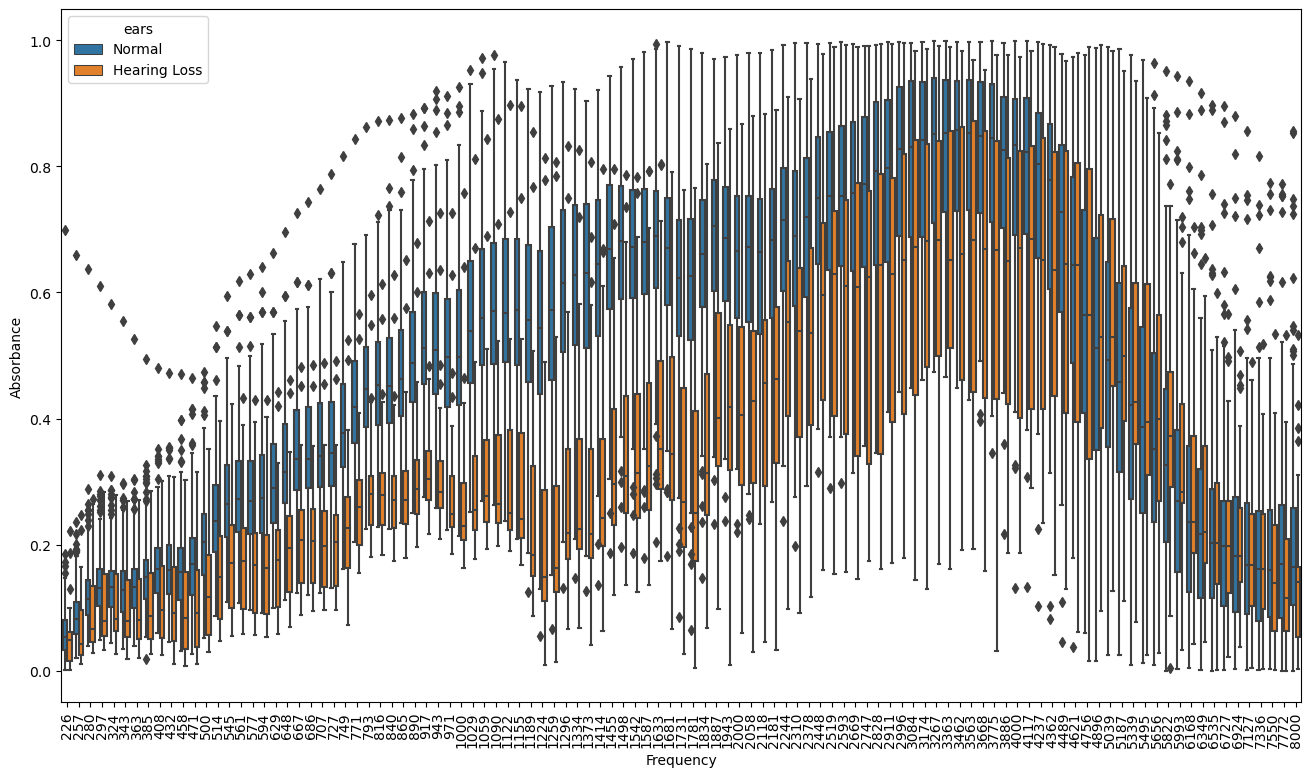

In [11]:
plt.figure(figsize = (16, 9))
plt.xticks(rotation = 90)
sns.boxplot(data = long_data, x = 'Frequency', y = 'Absorbance', hue = 'ears')

<AxesSubplot:xlabel='Frequency', ylabel='Absorbance'>

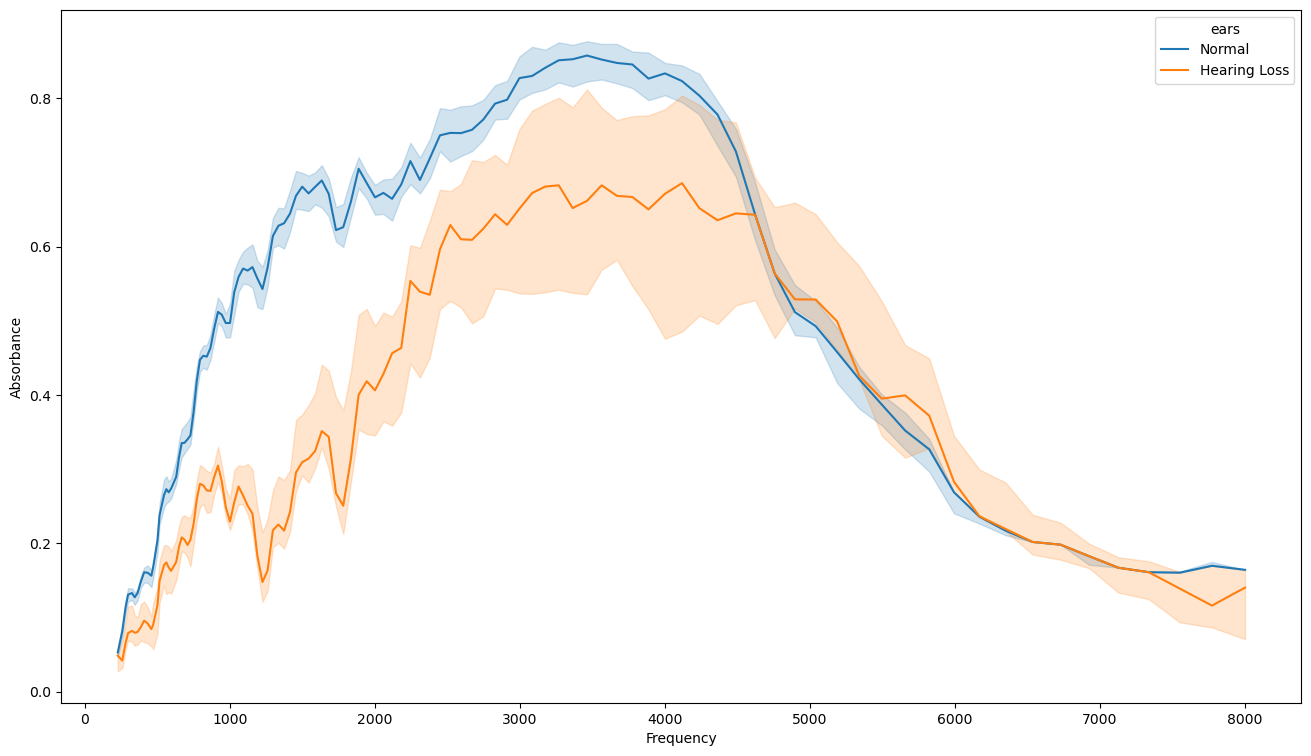

In [12]:
plt.figure(figsize = (16, 9))
sns.lineplot(data = long_data, x = 'Frequency', y = 'Absorbance', hue = 'ears', estimator = 'median')

There is a clear separation in the 1000 to 2000Hz area. In those frequencies, the normal ears have higher absorbance than ears with hearing loss.

### Looking at their correlation

<AxesSubplot:>

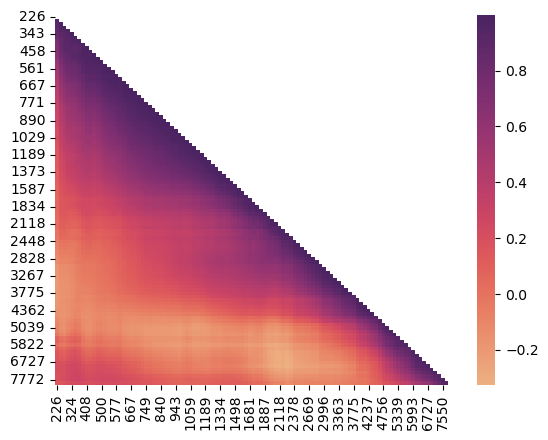

In [13]:
corr = absorbance.drop(columns = 'ears').corr(method = 'pearson')
mask = np.zeros_like(corr)
mask[ np.triu_indices_from(mask) ] = True

sns.heatmap(data = corr, mask = mask, cmap = 'flare')

Correlation between frequencies next or close to each other are highly correlated, as we can see from the dark diagonal line (\\). Less correlation between distant frequencies.

### Looking at the target variable

In [14]:
def barplot(df):
    category_counts = df.value_counts()
    barplot = sns.barplot(x = category_counts.index, y = category_counts)

    for i in barplot.containers:
        barplot.bar_label(i, )

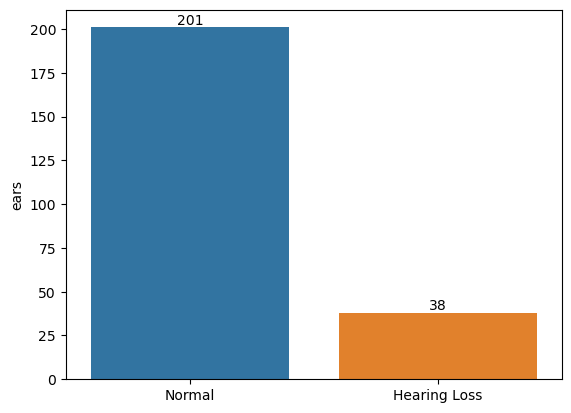

In [15]:
barplot(absorbance[ 'ears' ])

The target classes are imbalanced, in particular we have less data of ears with hearing losses which is crucial. Sampling methods might be needed to address this problem.

# 5. Data Preparation

### Set Default Values

In [16]:
seed = 131197
y = 'ears' # target

### Train Test Val Split

60 : 20 : 20

In [17]:
X_train, X_test, y_train, y_test = train_test_split(
    absorbance.drop(columns = y), # X
    absorbance[ y ], # y
    test_size = 0.4, 
    random_state = seed,
    stratify = absorbance[ y ],
)

In [18]:
X_test, X_val, y_test, y_val = train_test_split(
    X_test, # X
    y_test, # y
    test_size = 0.5, 
    random_state = seed,
    stratify = y_test,
)

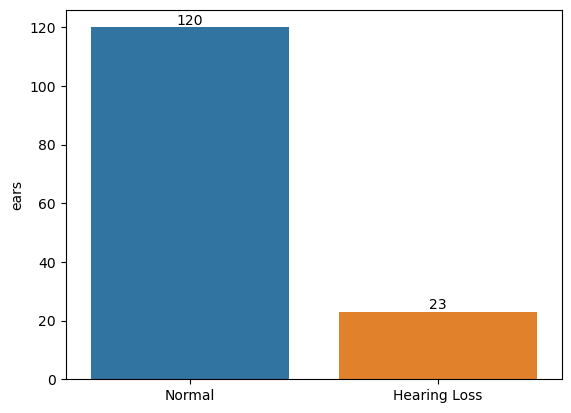

In [19]:
barplot(y_train)

### Sampling to balance out the classes

##### SMOTE

In [20]:
smote = SMOTE(random_state = seed)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

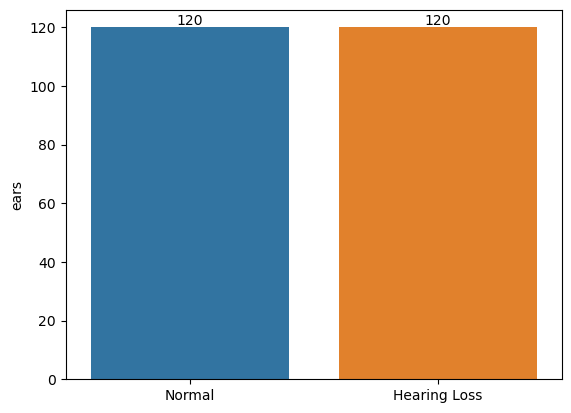

In [21]:
barplot(y_smote)

##### SMOTEENN

In [22]:
smoteenn = SMOTEENN(random_state = seed, smote = smote)
X_smoteenn, y_smoteenn = smoteenn.fit_resample(X_train, y_train)

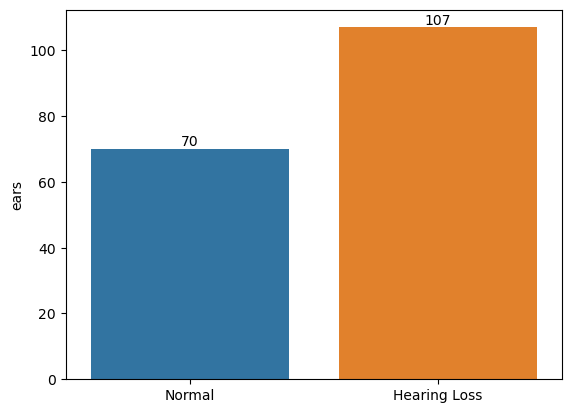

In [23]:
barplot(y_smoteenn)

##### SMOTETomek

In [24]:
smotetomek = SMOTETomek(random_state = seed, smote = smote)
X_smotetomek, y_smotetomek = smotetomek.fit_resample(X_train, y_train)

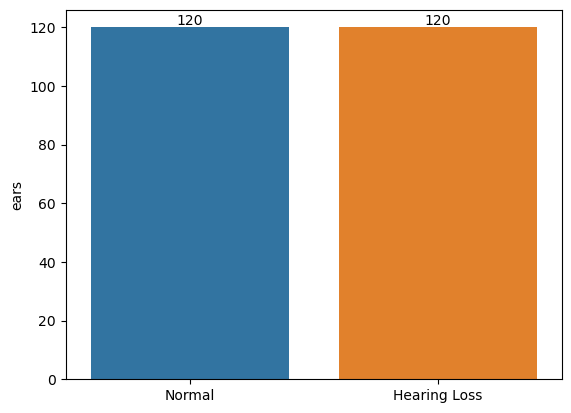

In [25]:
barplot(y_smotetomek)

### Compile the data sets

In [26]:
dataset = { 
    'train': { 'X': X_train, 'y': y_train },
    'test': { 'X': X_test, 'y': y_test },
    'val': { 'X': X_val, 'y': y_val },
    'smote': { 'X': X_smote, 'y': y_smote },
    'smoteenn': { 'X': X_smoteenn, 'y': y_smoteenn },
    'smotetomek': { 'X': X_smotetomek, 'y': y_smotetomek },
}

# 6. Modelling and Training

### Base Model

This task is to use Linear SVM Classifier.

In [27]:
model = LinearSVC(
    dual = False,
    max_iter = 10 ** 6,
    random_state = seed,
    class_weight = 'balanced'
)

### Designing Pipeline

The process is like this feature scaling > embedded feature selection > classification. And let's look at the parameters.

In [28]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('selector', SelectFromModel(estimator = model)),
    ('classifier', model)
])
pipeline.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('selector',
   SelectFromModel(estimator=LinearSVC(class_weight='balanced', dual=False,
                                       max_iter=1000000, random_state=131197))),
  ('classifier',
   LinearSVC(class_weight='balanced', dual=False, max_iter=1000000,
             random_state=131197))],
 'verbose': False,
 'scaler': StandardScaler(),
 'selector': SelectFromModel(estimator=LinearSVC(class_weight='balanced', dual=False,
                                     max_iter=1000000, random_state=131197)),
 'classifier': LinearSVC(class_weight='balanced', dual=False, max_iter=1000000,
           random_state=131197),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'selector__estimator__C': 1.0,
 'selector__estimator__class_weight': 'balanced',
 'selector__estimator__dual': False,
 'selector__estimator__fit_intercept': True,
 'selector__estimator__intercept_scaling': 1,
 'selector__estimator__loss': 'squa

The parameters we'll try to tune are as follows:

In [29]:
hyper_params = {
    'selector__estimator__C': [ 0.01, 0.1, 1, 10, 100 ],
    'selector__estimator__penalty': [ 'l1', 'l2' ],
    'selector__max_features': [ 5 ], # reduce to 5 features
    'classifier__C': [ 0.01, 0.1, 1, 10, 100 ],
    'classifier__penalty': [ 'l1', 'l2' ],
}

### Training

In [30]:
result = [ ] # container

In [31]:
for sample in dataset:
    if (sample == 'test' or sample == 'val'):
        continue
    X = dataset[ sample ][ 'X' ]
    y = dataset[ sample ][ 'y' ]
    
    # separating the regularisations for embedded selection
    for penalty in hyper_params[ 'selector__estimator__penalty' ]:
        grid = GridSearchCV(
            cv = 10, # k-fold
            n_jobs = -1, # use all cpu cores
            scoring = 'f1_macro',
            estimator = pipeline,
            return_train_score = True,
            param_grid = { **hyper_params, 'selector__estimator__penalty': [ penalty ] },
        )
        grid.fit(X, y)

        selector = grid.best_estimator_[ 'selector' ]
        classifier = grid.best_estimator_[ 'classifier' ]

        features = X.columns[ selector.get_support() ]

        train_precision = precision_score(
            average = 'macro',
            y_true = dataset[ 'train' ][ 'y' ],
            y_pred = grid.best_estimator_.predict(dataset[ 'train' ][ 'X' ])
        )
        val_precision = precision_score(
            average = 'macro',
            y_true = dataset[ 'val' ][ 'y' ],
            y_pred = grid.best_estimator_.predict(dataset[ 'val' ][ 'X' ])
        )
        train_recall = recall_score(
            average = 'macro',
            y_true = dataset[ 'train' ][ 'y' ],
            y_pred = grid.best_estimator_.predict(dataset[ 'train' ][ 'X' ])
        )
        val_recall = recall_score(
            average = 'macro',
            y_true = dataset[ 'val' ][ 'y' ],
            y_pred = grid.best_estimator_.predict(dataset[ 'val' ][ 'X' ])
        )

        result.append({
            'pipe': grid.best_estimator_,
            'features': features,
            'parameters': classifier.get_params(),
            'sample': sample,
            'regularisation': penalty,
            # 'n_features': len(features),
            'frequencies': ', '.join([ f for f in features ]),
            # 'train_precision': round(train_precision * 100, 2),
            # 'val_precision': round(val_precision * 100, 2),
            # 'diff_precision': round(abs(train_precision - val_precision) * 100, 2),
            'train_recall': round(train_recall * 100, 2),
            'val_recall': round(val_recall * 100, 2),
            # 'diff_recall': round(abs(train_recall - val_recall) * 100, 2),
        })

In [32]:
pd.DataFrame(result).iloc[  : , 3 :  ]

,sample,regularisation,frequencies,train_recall,val_recall
0,train,l1,"1296, 3886, 4117, 5656, 5822",82.88,81.25
1,train,l2,"1296, 1334, 3886, 5656, 5822",86.30,78.75
2,smote,l1,"727, 1373, 4000, 5187, 8000",85.80,83.75
3,smote,l2,"1334, 4117, 5495, 5656, 5822",87.55,82.50
4,smoteenn,l1,"890, 1029, 1414, 1587, 5993",85.05,88.75
5,smoteenn,l2,"257, 280, 1542, 1587, 5993",85.89,83.75
6,smotetomek,l1,"727, 1373, 4000, 5187, 8000",85.80,83.75
7,smotetomek,l2,"1334, 4117, 5495, 5656, 5822",87.55,82.50


Model 4 has the highest validation recall, and that is the only one with improved recall compared to the training set. It has the 2nd highest precision as well.

In [33]:
chosen_index = 4
chosen_row = result[ chosen_index ]
chosen_model = chosen_row[ 'pipe' ]

# 7. Testing

In [44]:
round(recall_score(
    average = 'macro',
    y_true = dataset[ 'test' ][ 'y' ],
    y_pred = chosen_model.predict(dataset[ 'test' ][ 'X' ])
) * 100, 2)

89.02

### Test Report

In [34]:
y_pred = chosen_model.predict(X_test)
y_true = y_test
print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

Hearing Loss       0.44      1.00      0.61         7
      Normal       1.00      0.78      0.88        41

    accuracy                           0.81        48
   macro avg       0.72      0.89      0.74        48
weighted avg       0.92      0.81      0.84        48



The recall looks good, which is what's important in a medical setting.

### Test Matrix

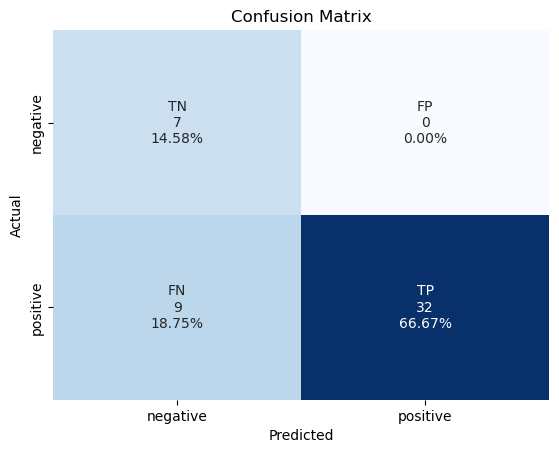

In [35]:
cf_matrix = confusion_matrix(y_true = y_true, y_pred = y_pred)
cf_flatten = cf_matrix.flatten()
labels = [ 'TN','FP','FN','TP' ]
counts = [ '{0:0.0f}'.format(value) for value in cf_flatten ]
percents = [ '{0:.2%}'.format(value/ np.sum(cf_matrix)) for value in cf_flatten ]
annots = [ f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(labels, counts, percents) ]

ax = sns.heatmap(
    fmt = '', 
    cbar = False,
    cmap = 'Blues',
    data = cf_matrix, 
    annot = np.asarray(annots).reshape(2, 2)
)
ax.set_title('Confusion Matrix')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels([ 'negative', 'positive' ])
ax.yaxis.set_ticklabels([ 'negative', 'positive' ])

## Display the visualization of the Confusion Matrix.
plt.show()

### Checking Overfitting

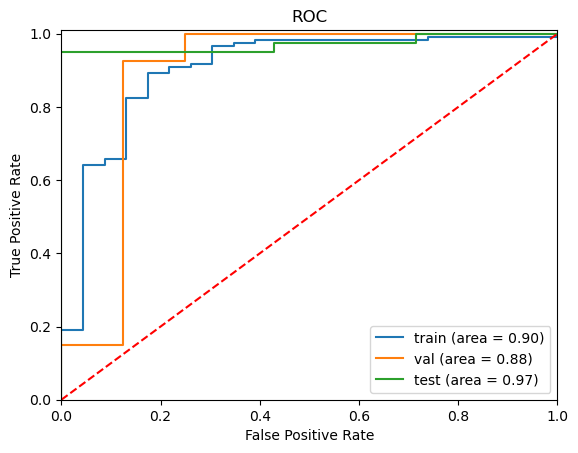

In [36]:
plt.figure()
splits = {
    'train': (X_train, y_train),
    'val': (X_val, y_val),
    'test': (X_test, y_test),
}

for s in splits:
    X, y = splits[ s ]
    y_score = chosen_model.decision_function(X)

    auc = roc_auc_score(y_true = y, y_score = y_score)
    fpr, tpr, _ = roc_curve(y_true = y, y_score = y_score, pos_label = 'Normal')
    plt.plot(fpr, tpr, label = '%s (area = %0.2f)' % (s, auc))

plt.plot([ 0, 1 ], [ 0, 1 ],'r--')
plt.xlim([ 0.0, 1.0 ])
plt.ylim([ 0.0, 1.01 ])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc = 'lower right')
plt.show()

Model generalizes well for training, validation and testing sets.

### Checking Correlation

<AxesSubplot:>

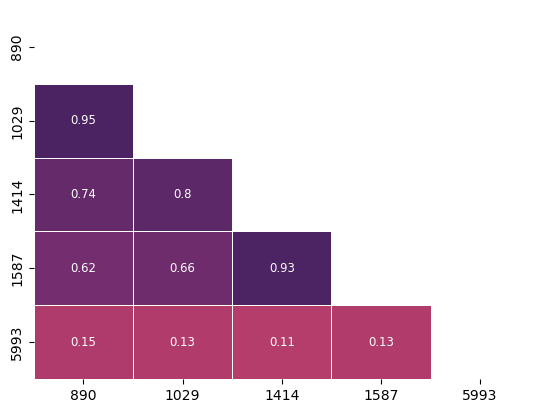

In [37]:
corr = round(abs(absorbance[ chosen_row[ 'features' ] ].corr(method = 'pearson')), 2)
    
mask = np.zeros_like(corr)
mask[ np.triu_indices_from(mask) ] = True

sns.heatmap(
    corr,
    cbar = False,
    mask = mask, 
    linewidths = .5, 
    annot_kws = { 'fontsize': 'small' },
    center = 0, 
    annot = True, 
    cmap = 'flare'
)

Less correlation overall.

### Feature Ranking

Text(0.5, 1.0, "Frequencies' Contribution")

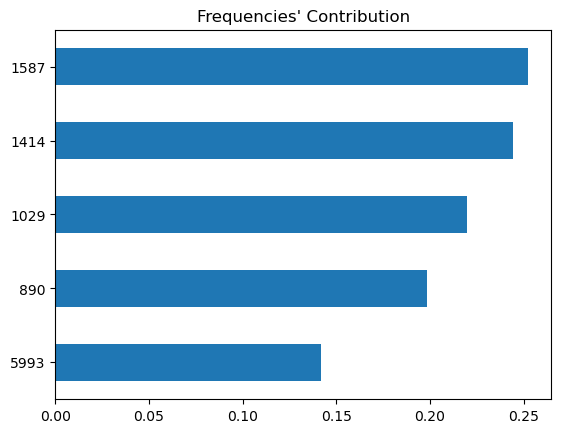

In [38]:
clf = chosen_row[ 'pipe' ][ 'classifier' ]
coef_plot = pd.Series(
    data = abs(clf.coef_[ 0 ]), 
    index = chosen_row[ 'features' ]
).sort_values().plot(kind = 'barh')
coef_plot.set_title('Frequencies\' Contribution')

### The chosen features

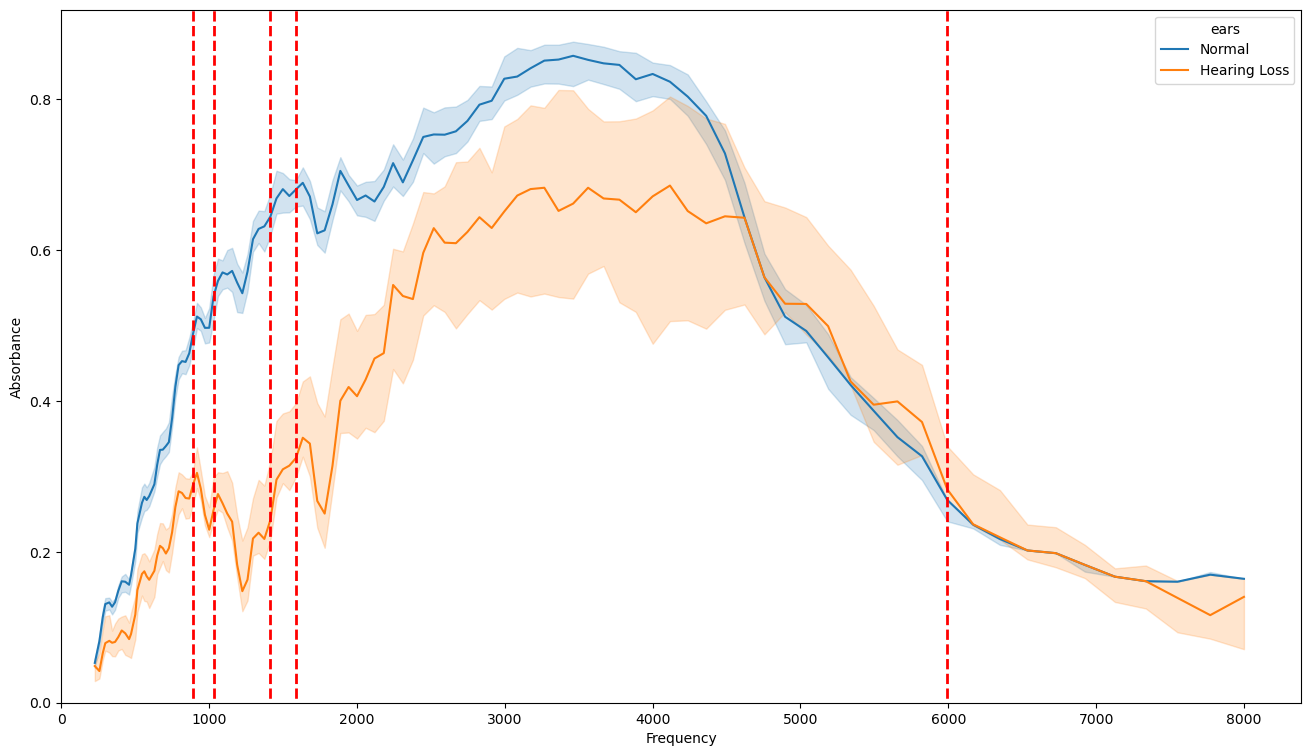

In [39]:
plt.figure(figsize = (16, 9))
chart = sns.lineplot(data = long_data, x = 'Frequency', y = 'Absorbance', hue = 'ears', estimator = 'median')

ymin, ymax = chart.get_ylim()
_, xmax = chart.get_xlim()

# vertical lines
chart.vlines(
    x = [ int(f) for f in chosen_row[ 'features' ] ], 
    ymin = ymin, 
    ymax = ymax, 
    ls = '--', 
    lw = 2,
    colors = 'red'
)

plt.xlim([ 0.0, xmax ])
plt.ylim([ 0.0, ymax ])
plt.show()

We can see the chosen features mostly in the 1000 to 2000 Hz, where there is the clearest separation between the lines.

### The formulae

In [40]:
bias = chosen_model[ 'classifier' ].intercept_[ 0 ]
weights = chosen_model[ 'classifier' ].coef_[ 0 ]
print(round(bias, 2))
for w, x in zip(weights, chosen_row[ 'features' ]):
    print('+' if w > 0 else '-', '%s * %sHz'%(abs(round(w, 2)), x))

-0.09
+ 0.2 * 890Hz
+ 0.22 * 1029Hz
+ 0.24 * 1414Hz
+ 0.25 * 1587Hz
- 0.14 * 5993Hz


From the coefficients, the higher absorbance in the 1000 to 2000 Hz area contributes positively to a normal ear classification.

# 8. Conclusion

Ears with lower absorbance levels in the 1000 to 2000 Hz area, are likely to suffer from conductive hearing loss.